Objective: 

To expose the best combination for strategy games available in the appstore in order to get a good user rating (4.0/5.0 and above) To analyse the dataset, we will look at the relationship as below:

Strategy

    Genre grouping
    Game Size analysis
    Release date/ Update date factor
    Game Price and In-App Purchase Factor (Grouped by Genre)
    Age Rating Factor


Data Cleaning

    Games without User Rating are dropped.
    
    Games with less than 200 user rating AND days since last update date <6month are dropped to prevent biased ratings from the developer
    
    Genre tags "Entertainment" and "Games" are removed from the Genre string as it does not provide meaningful insight
    
    The remaining of the string are checked and grouped as follows:
        Puzzle= Puzzle/Board
        Adventure= Adventure/Role/Role Playing
        Action = Action
        Family = Family/Education


In [1]:
import pandas as pd
gamestats = pd.read_csv(r'appstore_games.csv')
gamestatsf = gamestats.copy()

In [2]:
gamestatsf.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [3]:
gamestats.shape

(17007, 18)

In [4]:
# Drop unused rows and columns
gamestatsf = gamestatsf.drop(columns="URL")
gamestatsf = gamestatsf.drop(columns="Icon URL")

In [7]:
gamestatsf.columns

Index(['ID', 'Name', 'Subtitle', 'Average User Rating', 'User Rating Count',
       'Price', 'In-app Purchases', 'Description', 'Developer', 'Age Rating',
       'Languages', 'Size', 'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date'],
      dtype='object')

In [8]:
#assigning only required columns
gamestatsf.columns= ['ID', 'Name','Subtitle','User_Rating','User_Rating_Count',
                     'Price','In_App_Purchase','Desc','Dev','Age_Rating',
                     'Languages','Size','Primary_Genre','Genre',
                     'Release_Date','Current_Version_Date']

In [9]:
gamestatsf.head(15)

,ID,Name,Subtitle,User_Rating,User_Rating_Count,Price,In_App_Purchase,Desc,Dev,Age_Rating,Languages,Size,Primary_Genre,Genre,Release_Date,Current_Version_Date
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,286210009,Sudoku - Classic number puzzle,Original brain training,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,286313771,Gravitation,NaN,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,286363959,Colony,NaN,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
8,286566987,Carte,NaN,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,286682679,"""Barrels O' Fun""",NaN,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008


In [10]:
#drop games with no ratings

gamestatsf = gamestatsf[pd.notnull(gamestatsf['User_Rating'])]

In [15]:
gamestatsf.dtypes

ID                        int64
Name                     object
Subtitle                 object
User_Rating             float64
User_Rating_Count       float64
Price                   float64
In_App_Purchase          object
Desc                     object
Dev                      object
Age_Rating               object
Languages                object
Size                    float64
Primary_Genre            object
Genre                    object
Release_Date             object
Current_Version_Date     object
dtype: object

In [16]:
import datetime

In [17]:
# Converting Date strings to datetime objects
gamestatsf['Release_Date'] = pd.to_datetime(gamestatsf['Release_Date'])
gamestatsf['Current_Version_Date'] = pd.to_datetime(gamestatsf['Current_Version_Date'])

In [18]:
#New column for time gap between release & update
gamestatsf['Update_Gap']=gamestatsf.Current_Version_Date-gamestatsf.Release_Date

In [19]:
# To prevent biased ratings,Drop games that has rating less than 200 user rating count AND 
#(Release Date to Update date) less than 6 months

Low_User_Count=(gamestatsf[gamestatsf.User_Rating_Count <200].index) &\
gamestatsf[gamestatsf.Update_Gap < datetime.timedelta(days=175)].index

In [20]:
gamestatsf.drop(Low_User_Count , inplace = True)

In [21]:
gamestatsfg = gamestatsf.copy()

In [22]:
gamestatsfg['Genre'] = gamestatsfg['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
gamestatsfg['Genre'] = gamestatsfg['Genre'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
gamestatsfg['Genre']=gamestatsfg['Genre'].str.strip()
Non_Main_Genre=gamestatsfg[~gamestatsfg.Genre.str.contains('Puzzle') & \
                           ~gamestatsfg.Genre.str.contains('Action') & \
                           ~gamestatsfg.Genre.str.contains('Family')& \
                           ~gamestatsfg.Genre.str.contains('Education')& \
                           ~gamestatsfg.Genre.str.contains('Family')& \
                           ~gamestatsfg.Genre.str.contains('Adventure')&\
                           ~gamestatsfg.Genre.str.contains('Board')&\
                           ~gamestatsfg.Genre.str.contains('Role')].index
gamestatsfg.drop(Non_Main_Genre , inplace=True)
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Action'),'Genre'] = 'Action'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Family'),'Genre'] = 'Family'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Education'),'Genre'] = 'Family'

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

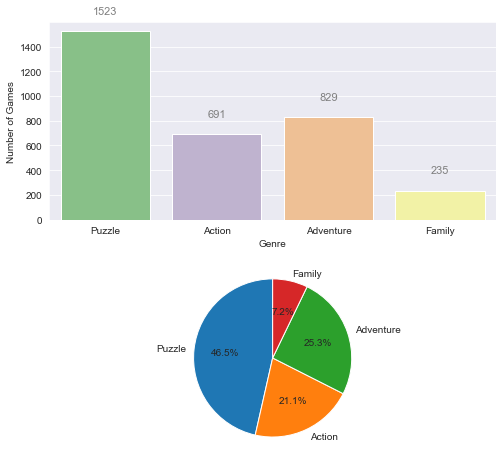

In [29]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,1, figsize=(8,8))

#Histogram
x=['Puzzle','Action','Adventure','Family']

y = [gamestatsfg.Genre[(gamestatsfg['Genre']=='Puzzle')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Action')].count(),\
     gamestatsfg.Genre[(gamestatsfg['Genre']=='Adventure')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Family')].count()]

vis1= sns.barplot(x,y,palette='Accent',ax=axes[0])
vis1.set(xlabel='Genre',ylabel='Number of Games')
for p in vis1.patches:
    vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),textcoords='offset points')
    
    
    
#Pie Chart
NG = [gamestatsfg.Genre[(gamestatsfg['Genre']=='Puzzle')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Action')].count(),\
     gamestatsfg.Genre[(gamestatsfg['Genre']=='Adventure')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Family')].count()]
G = ['Puzzle','Action','Adventure','Family']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.show()


plt.ioff()

Simple Analysis on Genre distribution, we can see that number of games follows Puzzle > Adventure > Action > Family

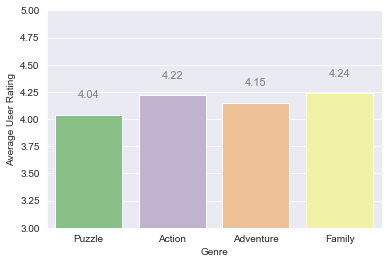

In [30]:
x=['Puzzle','Action','Adventure','Family']
y = [gamestatsfg.User_Rating[(gamestatsfg['Genre']=='Puzzle')].mean(),\
     gamestatsfg.User_Rating[(gamestatsfg['Genre']=='Action')].mean(),\
     gamestatsfg.User_Rating[(gamestatsfg['Genre']=='Adventure')].mean(),\
     gamestatsfg.User_Rating[(gamestatsfg['Genre']=='Family')].mean()]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Average User Rating')
vis1.set(ylim=(3,5))


for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

plt.ioff()

Average Rating based on Genre shows Action and Family games have slightly higher User Rating compared to Puzzle and Adventure games

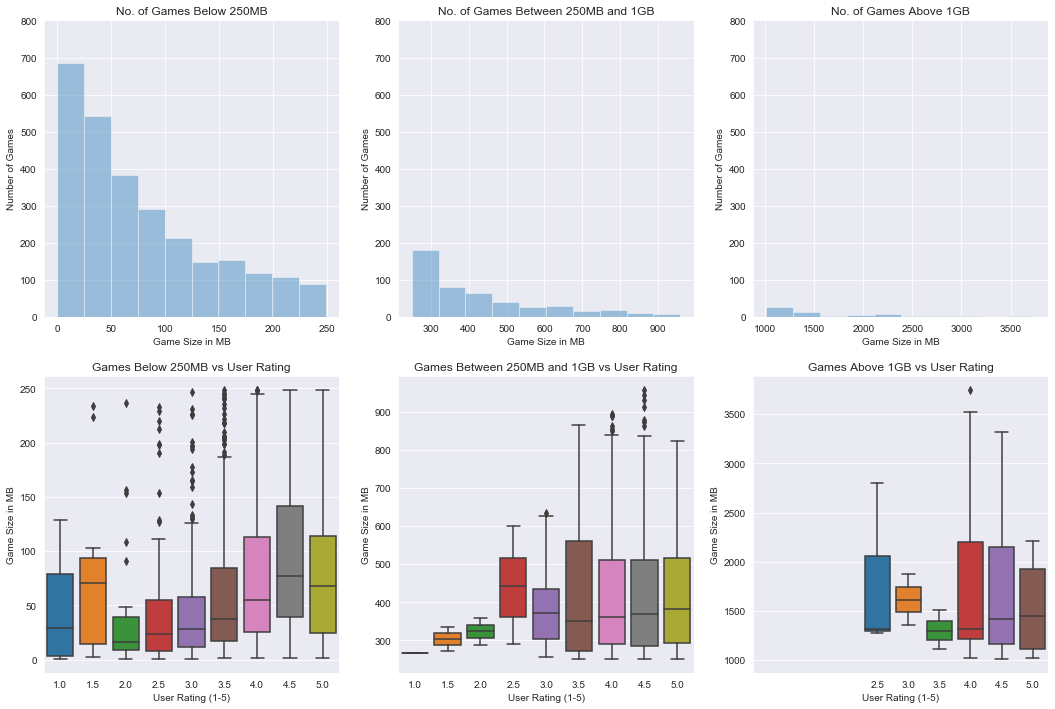

In [31]:
gamestatsfg['Size2'] = round(gamestatsfg['Size']/1000000,1)
Size_Less_250MB = gamestatsfg[gamestatsfg.Size2 <250]
Size_More_250MB = gamestatsfg[(gamestatsfg.Size2 >=250) & (gamestatsfg.Size2 <1000)]
Size_More_1GB = gamestatsfg[gamestatsfg.Size2 >=1000]


sns.set_style('darkgrid')
f, axes = plt.subplots (2,3, figsize=(18,12))



vis1 = sns.boxplot( data = Size_Less_250MB, x = 'User_Rating', y = 'Size2',  ax=axes[1,0])
vis2 = sns.boxplot( data = Size_More_250MB, x = 'User_Rating', y = 'Size2', ax=axes[1,1])
vis3 = sns.boxplot( data = Size_More_1GB, x = 'User_Rating', y = 'Size2', ax=axes[1,2],)
vis4 = sns.distplot(Size_Less_250MB.Size2, bins= 10, kde=False,ax=axes[0,0])
vis5 = sns.distplot(Size_More_250MB.Size2, bins= 10, kde=False,ax=axes[0,1])
vis6 = sns.distplot(Size_More_1GB.Size2, bins= 10, kde=False,ax=axes[0,2])

vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis2.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis3.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis4.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis5.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis6.set(xlabel='Game Size in MB',ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')
vis3.set(xlim=(-4, 5.5))

vis4.set(ylim=(0, 800))
vis5.set(ylim=(0, 800))
vis6.set(ylim=(0, 800))

plt.ioff()




Size Factor

    From the visualization, we can see that most of the game are below 250MB In which to achieve score 4 and above it has to be 100MB and above.
    Second column of the chart shows that good games (score >4) have to be 600MB and above, with the exception
    A very small portion of games (less than 100 titles) are above 1GB, in which the minimum score for the game is 2.5 This might be due to the user sentiment who gives credit to the huge game content and possibly better game graphics.


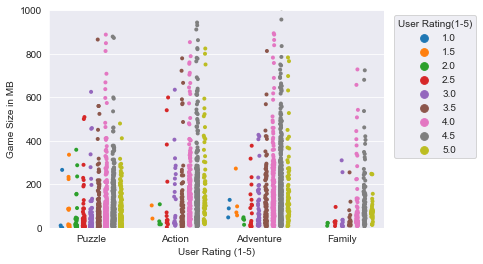

In [32]:
vis1= sns.stripplot(y='Size2' , x='Genre', data=gamestatsfg,\
                hue='User_Rating',dodge=True, size=4)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))

vis1.set(ylim=(0, 1000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
plt.ioff()

We can easily say that more than half of the games from these 4 genre gets a score of 4 and above, in which the majority focuses on size 400MB and below. With the exception of Action which still gets good rating up to 600MB, and Adventure game up to 800MB. Family (and education) genre has the least number of games in the store, and a 200MB size is sufficient to get score of 4.0 and above

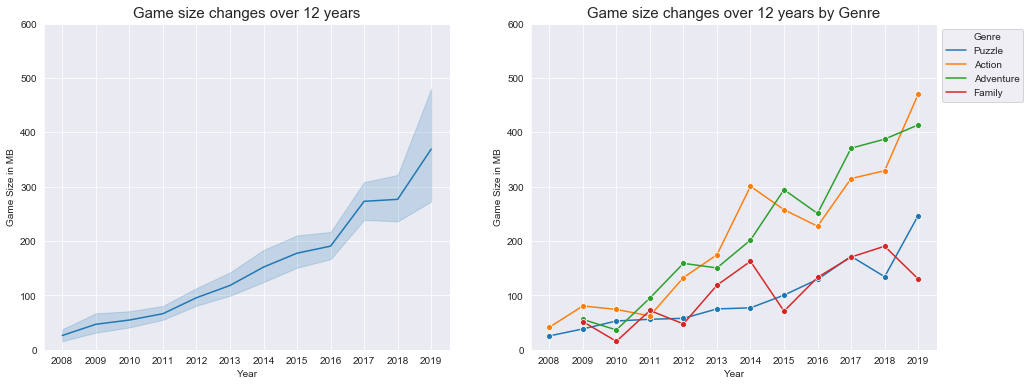

In [33]:
gamestatsfg['Year'] = gamestatsfg['Release_Date']
gamestatsfg['Year']=gamestatsfg['Year'].astype(str)
#extract year ony
for i in (list(gamestatsfg.index.values)):
    gamestatsfg['Year'][i]=gamestatsfg['Year'][i][:4]
    
g, axes = plt.subplots (1,2, figsize=(16,6))

vis1 = sns.lineplot(x=gamestatsfg.Year, y=gamestatsfg.Size2, data=gamestatsfg, ax=axes[0])
vis1.set(ylim=(0, 600))
vis2 = sns.lineplot(x=gamestatsfg.Year, y=gamestatsfg.Size2, hue=gamestatsfg.Genre, err_style=None, marker='o',ax=axes[1])
vis2.set(ylim=(0, 600))
plt.legend(bbox_to_anchor=(1, 1))

axes[0].set_title('Game size changes over 12 years',fontsize=15)
axes[1].set_title('Game size changes over 12 years by Genre',fontsize=15)

vis1.set(xlabel='Year',ylabel='Game Size in MB')
vis2.set(xlabel='Year',ylabel='Game Size in MB')

plt.ioff()



From the left graph we can see a almost Linear (rougly 30MB per year) increase of game size. We can also notice that the error margin has increased constantly over the years, this means the size of game has a bigger range. We can deduce that smaller size games are still relatable but at the same time developers challenged the market with bigger size games (as big as 3.7GB per game)

The right graph shows the growth of game size per game Genre. It is noted that the Game Size fluctuates from year to year, but shows an overall trend of increasing, especially Action Genre which shows a constant growth in the last 5 years


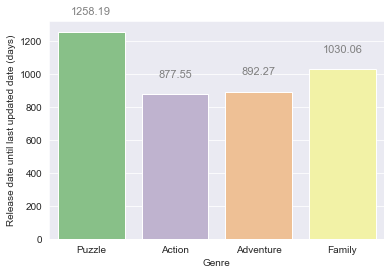

In [34]:
#Convert time delta to int values
for i in (list(gamestatsfg.index.values)):
    gamestatsfg.Update_Gap[i]=gamestatsf.Update_Gap[i].days

x=['Puzzle','Action','Adventure','Family']
y = [gamestatsfg.Update_Gap[(gamestatsfg['Genre']=='Puzzle')].mean(),\
     gamestatsfg.Update_Gap[(gamestatsfg['Genre']=='Action')].mean(),\
     gamestatsfg.Update_Gap[(gamestatsfg['Genre']=='Adventure')].mean(),\
     gamestatsfg.Update_Gap[(gamestatsfg['Genre']=='Family')].mean()]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Release date until last updated date (days)')



for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')



This chart provides us the insight that on average, Action and Adventure games has more recent updates compared to Puzzle and Family games. We can deduce the need for new content are required for Action and Adventure games is more than Puzzle and Family genre.


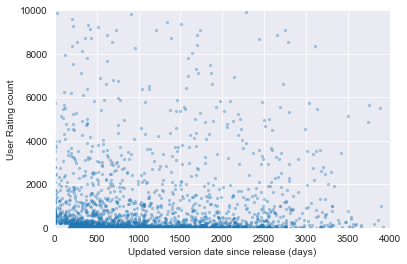

In [35]:
plt.scatter(gamestatsfg.Update_Gap, gamestatsfg.User_Rating_Count, alpha=0.3, s=5) 

plt.xlim(0, 4000)
plt.ylim(0, 10000)

plt.xlabel('Updated version date since release (days)')
plt.ylabel('User Rating count')
plt.show()



We do not have the data of total downloads or total users for each game, but we can assume more user rating count = more downloads. From the graph above, we are able to say there are more User Rating count (hence number of downloads) if the developer provides a more recent update.


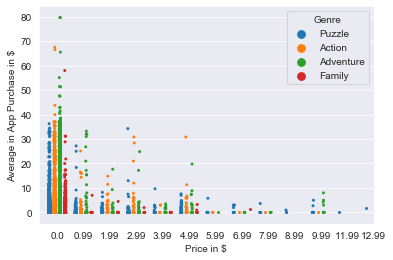

In [36]:
gamestatsfg2=gamestatsfg.copy()
import statistics
gamestatsfg2['In_App_Purchase'] = gamestatsfg2['In_App_Purchase'].str.replace(',', '') 
gamestatsfg2.In_App_Purchase=gamestatsfg2.In_App_Purchase.fillna(0)

for i in (list(gamestatsfg2.index.values)):
    if gamestatsfg2.In_App_Purchase[i] ==0:
        gamestatsfg2['In_App_Purchase'][i]=0.01
    elif gamestatsfg2.In_App_Purchase[i] !=0:
        A=str.split(gamestatsfg2.In_App_Purchase[i])
        A=[float(i) for i in A]
        gamestatsfg2['In_App_Purchase'][i]=statistics.mean(A)
vis1= sns.stripplot(y=gamestatsfg2.In_App_Purchase , x=gamestatsfg2.Price, data=gamestatsfg2, hue=gamestatsfg2.Genre, dodge=True, size=3)

vis1.set(xlabel='Price in $',ylabel='Average in App Purchase in $')
vis1.set(xlim=(-0.7, 12))
plt.ioff()



The pricier the game gets, the lower the In-App Purchase items are. This is expected as low price and free games needs to sustain with some form of income.


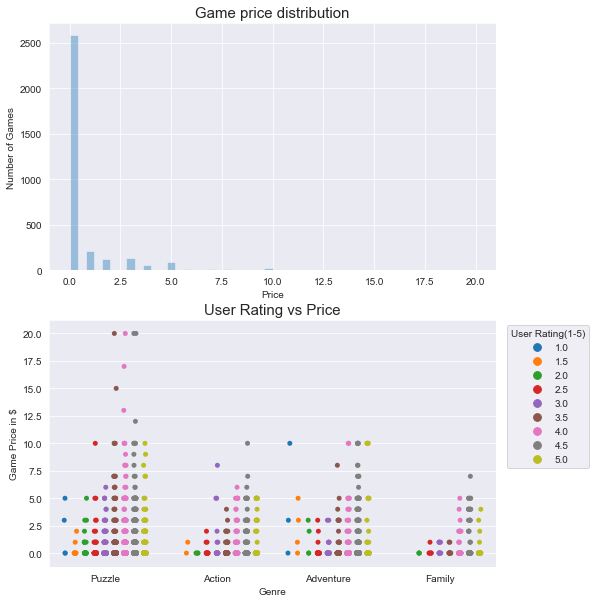

In [37]:
h, axes = plt.subplots (2,1, figsize=(8,10))

vis1 = sns.distplot(gamestatsfg.Price,kde=None,ax=axes[0])
vis2 = sns.stripplot(y=gamestatsfg.Price, x=gamestatsfg.Genre, data=gamestatsfg,ax=axes[1],hue=gamestatsfg.User_Rating, dodge=1)

vis1.set(xlabel='Price',ylabel='Number of Games')
vis2.set(xlabel='Genre',ylabel='Game Price in $')

axes[0].set_title('Game price distribution',fontsize=15)
axes[1].set_title('User Rating vs Price',fontsize=15)
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.22, 1))

plt.ioff()



The trend of user rating with respect to price becomes better as the game becomes pricier.


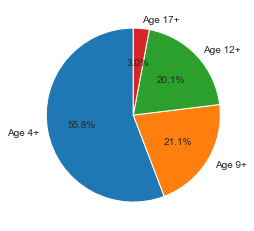

In [38]:


NAR = [gamestatsfg2.Age_Rating[(gamestatsfg2['Age_Rating']=='4+')].count(),gamestatsfg2.Age_Rating[(gamestatsfg2['Age_Rating']=='9+')].count(),\
     gamestatsfg2.Age_Rating[(gamestatsfg2['Age_Rating']=='12+')].count(),gamestatsfg2.Age_Rating[(gamestatsfg2['Age_Rating']=='17+')].count()]
AR = ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(NAR, labels=AR, startangle=90, autopct='%.1f%%')
plt.show()

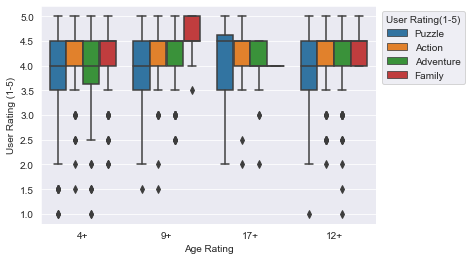

In [39]:
vis1 = sns.boxplot(x=gamestatsfg2.Age_Rating, y=gamestatsfg.User_Rating, data=gamestatsfg, hue=gamestatsfg.Genre, dodge=True)

vis1.set(xlabel='Age Rating',ylabel='User Rating (1-5)')
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.28, 1))
plt.ioff()



Inference made:

    For simpler games, focus on size between 100MB to 150MB of contents
    
    For more complex games, target a content of 500MB and above
    
    Games above 1GB have good tendancy to land above 3 score and above, provided sufficient resource available to the developer
    
    Puzzle games are less saturated above 400MB to achieve score 4.0 and above
    
    Action & Adventure Genre games are less saturated above 600MB to achieve score 4.0 and above
    
    Family/Educational games has less competition overall
    
    Almost 90% of the developers focuses on games below 1 Dollar and places In-App Purchase as their strategy for income
    
    On average, the trend shows that the average game size increase of 30MB per/year but small size games are still relatable in the store.
    
    Puzzle and Family games requires less game updates on average.
    
    Paid Games tend to have better reviews espeicially those above 9 Dollar scores 4.0 User Rating
    
    Consumers enjoy more matured content i.e games targetted for 17+ age and above
